<h1 style="color:blue;text-align:center">Sheet III</h1>
<h2 style="color:blue;text-align:center">Descriptive Statistics - Frequency Tables and
Distributions</h2>

<h3 style="color:green;text-align:center">Exercise 1</h3>

Consider the results of the national elections in Germany in 2013 and
2017:


| Party | Results 2013 (%) |Results 2017 (%)|
|-------|------------------|----------------|
| CDU | 26,8% |34,1%|
| SPD | 20,5% | 25,7% |
| AfD | 12,6% | 4,7% |
| FDP | 10,7% | 4,8% |
| DIE LINKE | 9,2% | 8,6% |
| GRUENE | 8,9% | 8,4% |
| CSU | 6,2% | 7,4% |
| Others | 5,0% | 6,2% |

Summarize the results of 2017 in a pie and abar chart. Compare the
results in 2013 and 2017 with an appropriate bar chart.

**Answer**: The table shows the relative frequencies of each party. We
can draw a pie chart and a barplot with the parties on the x-axis and the
relative frequencies on the y-axis. To compare the ersults in 2013 and
in 2017 we can show the differences in proportion of votes in barplot.

In [1]:
install.packages("dplyr")
library("dplyr")

Installing package into ‘/home/jrana/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
df <- tibble (
res_2013 = c ( 0.268 , 0.205 , 0.126 , 0.107 , 0.092 
    , 0.089 ,0.062 , 0.05 ) ,
res_2017= c ( 0.341 , 0.257 , 0.047 , 0.048 , 0.086 
             , 0.084 , 0.074 , 0.062 ) ,
diff=res_2017-res_2013,    
party = c ( "CDU" , "SPD" ,"AFD" , "FDP" , 
           "Die Linke" , "Gruene" , "CSU" , "Others" ) ,
)
df

res_2013,res_2017,diff,party
<dbl>,<dbl>,<dbl>,<chr>
0.268,0.341,0.073,CDU
0.205,0.257,0.052,SPD
0.126,0.047,-0.079,AFD
0.107,0.048,-0.059,FDP
0.092,0.086,-0.006,Die Linke
0.089,0.084,-0.005,Gruene
0.062,0.074,0.012,CSU
0.050,0.062,0.012,Others


## pie chart

In [3]:
par(mar=c(2,2,0.5,0.5),mfrow=c(3,1),cex=.45)

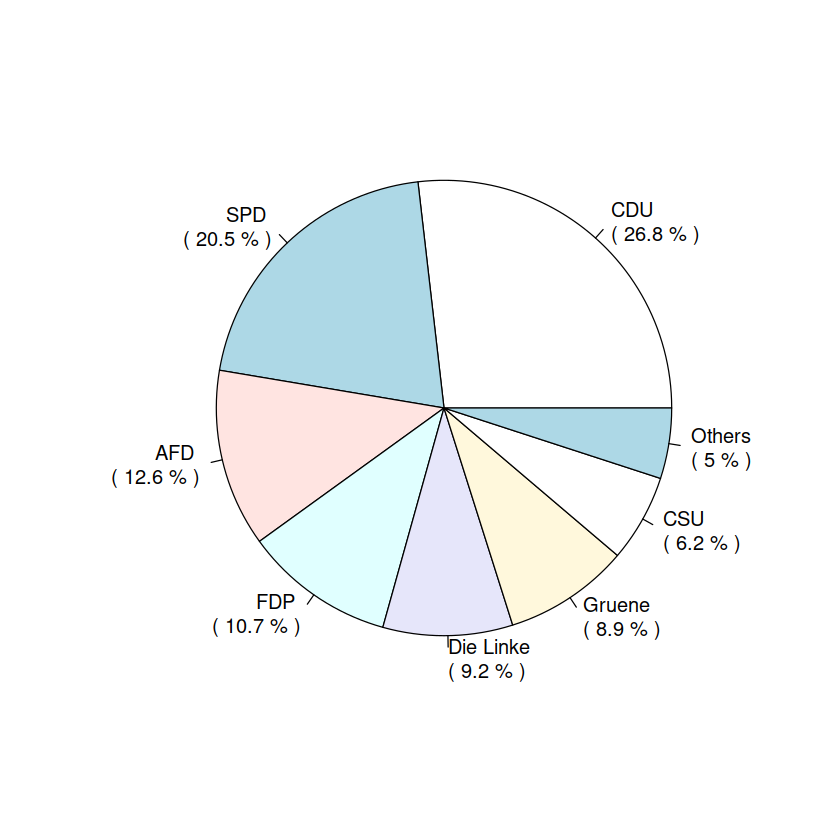

In [7]:
pie(df$res_2013,labels = paste(df$party,"
(",df$res_2013*100,"%",")"))

## barplot

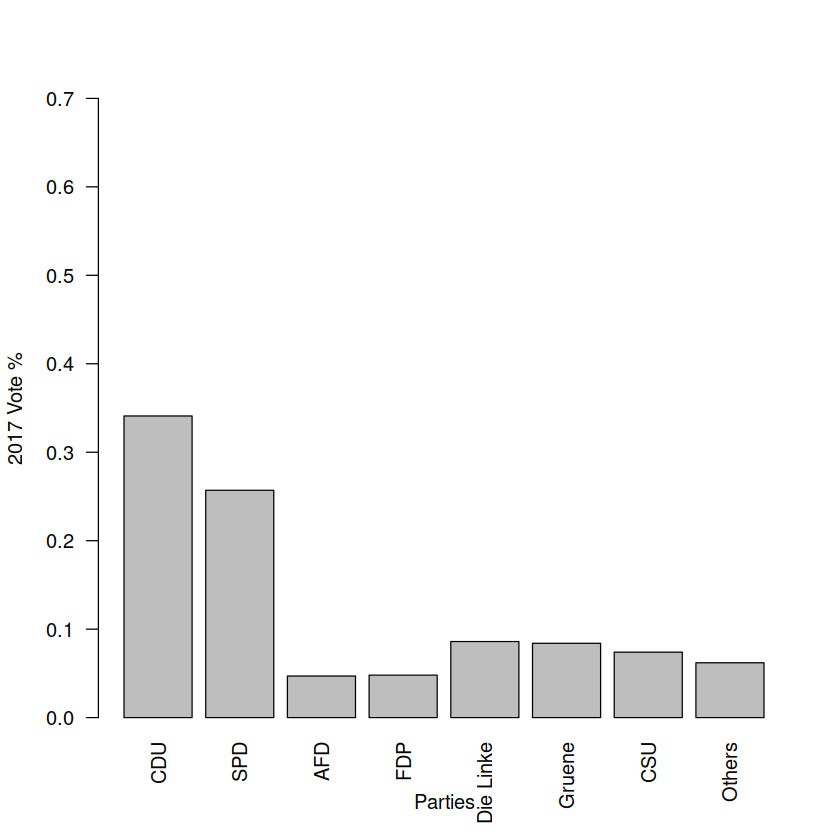

In [16]:
barplot(df$res_2017,names.arg=df$party,
       ylim=c(0,0.7),xlab="Parties",ylab="2017 Vote %"
       ,las=2
       )

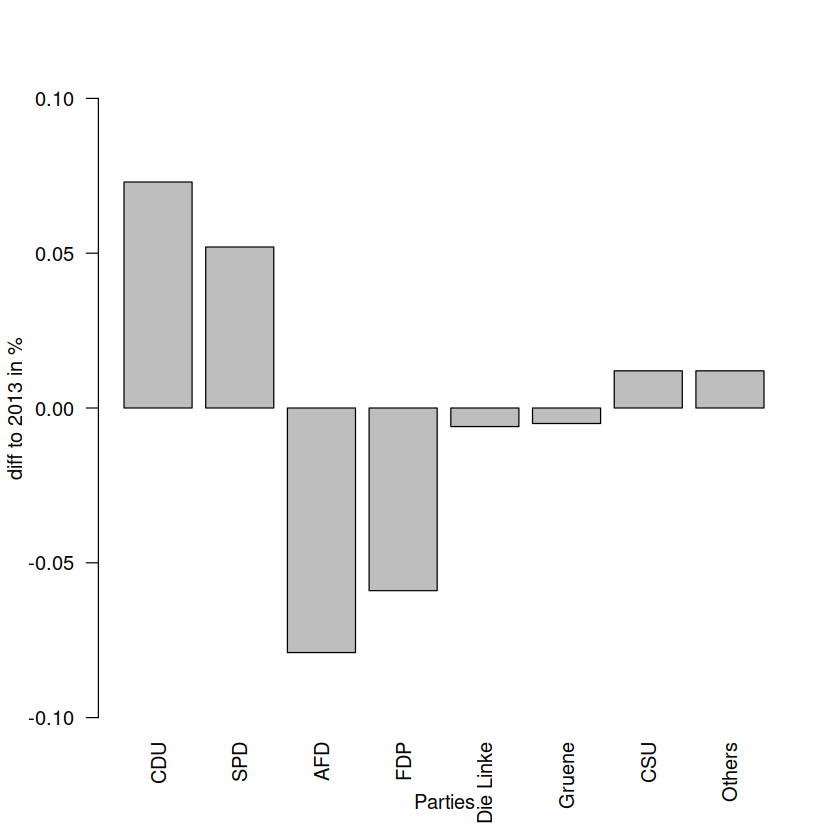

In [22]:
barplot(df$diff,names.arg=df$party,
       ylim=c(-0.1,0.1),xlab="Parties",
        ylab="diff to 2013 in %"
       ,las=2
       )

<h3 style="color:green;text-align:center">Exercise 2</h3>

he data shown in the list are the times in milliseconds it took one of
us to move the mouse over a small target in a series of 20 trials. The
times are sorted from shortest to longest.
568, 577, 581, 640, 641, 645, 657, 673, 696, 703, 720, 728, 729, 777, 808,
824, 825, 865, 875, 1007

In [26]:
df<-tibble(vals=c(568, 577, 581, 640, 641, 645, 657, 673, 696, 703, 720, 728, 729, 777, 808,
824, 825, 865, 875, 1007))
df %>% slice(1:5)

vals
<dbl>
568
577
581
640
641


+ (a) Compute and draw the cumulative frequency distribution.

In [32]:
df %>% count(vals) %>%
    mutate(
        abs.freq=n,
        rel.freq=abs.freq/nrow(df),
        cum.rel.freq=cumsum(rel.freq)
          ) %>% select(-n)

vals,abs.freq,rel.freq,cum.rel.freq
<dbl>,<int>,<dbl>,<dbl>
568,1,0.05,0.05
577,1,0.05,0.10
581,1,0.05,0.15
640,1,0.05,0.20
641,1,0.05,0.25
645,1,0.05,0.30
657,1,0.05,0.35
673,1,0.05,0.40
696,1,0.05,0.45


+ Compute and draw the cumulative frequency distribution.

In [34]:
H<-ecdf(df$vals) # ecdf=Empirical Cumulative Distribution Function
print(H)

Empirical CDF 
Call: ecdf(df$vals)
 x[1:20] =    568,    577,    581,  ...,    875,   1007


In [36]:
H(800) # less equal 800

[1] 0.7

In [37]:
 1-H(725) # greater than 725

[1] 0.45

In [38]:
H(777)-H(642) #>642, <=777

[1] 0.45

In [40]:
H(696) - H(695) ## equal to 696

[1] 0.05